> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper, L.A. Barba,N.C. Clementi__

# Step to the future

Welcome to Lesson 2 of the course module "Initial Value Problems
(IVPs)," in _Computational Mechanics_ The previous lesson, [Catch things
in motion](./01_Catch_Motion), showed you how to compute
velocity and acceleration of a moving body whose positions were known. 

Time history of position can be captured on a long-exposure photograph
(using a strobe light), or on video. But digitizing the positions from
images can be a bit tedious, and error-prone. Luckily, you found online a
data set from a motion-capture experiment of a falling ball, with high
resolution [1]. You computed acceleration and found that it was smaller
than the theoretical value of $9.8 \rm{m/s}^2$ and _decreased_ over
time. The effect is due to air resistance and is what leads to objects
reaching a _terminal velocity_ in freefall.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Set things up to compute velocity and position

Your challenge now is to find the motion description—the position
$x(t)$—from a function of acceleration. In the [previous
lesson](01_Catch_Motion), you did the opposite: with
position data, get the velocity and acceleration, using _numerical
derivatives_:

$v(t_i) = \frac{dx}{dt} \approx \frac{x(t_i+\Delta t)-x(t_i)}{\Delta t}$

$a(t_i) = \frac{dv}{dt} \approx \frac{v(t_i+\Delta t)-v(t_i)}{\Delta t}$

Almost every problem that deals with Newton's second law is a second-order differential equation. The acceleration is a function of position, velocity, and sometimes time _if there is a forcing function f(t)_. 

The key to solving a second order differential equation is realizing that if you have the initial velocity, you can use the acceleration to find the velocity after a short interval of time. And if you have the initial position, you can use the known velocity to find the new position after a short interval of time. Let's rearrange the equation for acceleration above, by solving for the velocity at $t_i + \Delta t$:

$v(t_i+\Delta t)   \approx  v(t_i) + a(t_i) \Delta t$

Consider our first computational mechanics model of a freefalling object that is dropped.

![Object in free fall with free body diagram](../images/freefall.png)

An object falling is subject to the force of 

- gravity ($F_g$=mg) and 
- drag ($F_d=cv^2$)

Acceleration of the object:

$\sum F=ma=F_g-F_d=cv^2 - mg = m\frac{dv}{dt}$

so,

$a=\frac{c}{m}v(t_{i})^2-g$

then, our acceleration is defined from Newton's second law and position is defined through its definition, $v=\frac{dx}{dt}$. 

_Note: the direction of positive acceleration was changed to up, so that a positive $x$ is altitude, you will still have the same speed vs time function from [Module_01-03_Numerical_error](https://github.uconn.edu/rcc02007/CompMech01-Getting-started/blob/master/notebooks/03_Numerical_error.ipynb)_

### Step through time

In the code cell below, you define acceleration as a function of velocity and add two parameters `c` and `m` to define drag coefficient and mass of the object.

In [2]:
def a_freefall(v,c=0.25,m=60):
    '''Calculate the acceleration of an object given its 
    drag coefficient and mass
    
    Arguments:
    ---------
    v: current velocity (m/s)
    c: drag coefficient set to a default value of c=0.25 kg/m
    m: mass of object set to a defualt value of m=60 kg
    
    returns:
    ---------
    a: acceleration of freefalling object under the force of gravity and drag
    '''
    a=-c/m*v**2*np.sign(v)-9.81
    return a

Now you use a `for` statement to step through the sequence of
acceleration values, each time computing the velocity and position at
the subsequent time instant. You first have to __initialize__ our
variables `x` and `v`. You can use initial conditions to set `x[0]` and
`v[0]`. The rest of the values you will overwrite based upon our
stepping solution.

You are applying the equation for $v(t_i + \Delta t)$ above, and a similar equation for position:

$x(t_i+\Delta t)   \approx  x(t_i) + v(t_i) \Delta t$

In [3]:
N = 100 # define number of time steps
t=np.linspace(0,12,N) # set values for time (our independent variable)
dt=t[1]-t[0]
x=np.zeros(len(t)) # initialize x
v=np.zeros(len(t)) # initialize v

x[0] = 440 # define initial altitude of the object
v[0] = 0

for i in range(1,N):
    dvdt = a_freefall(v[i-1])
    v[i] = v[i-1] + dvdt*dt
    x[i] = x[i-1] + v[i-1]*dt

In [4]:
a_freefall(-10)

-9.393333333333334

And there you have it. You have computed the velocity __and position__
over time from Newton's second law. You can now make plots of the
computed variables. Note that you use the Matplotlib
[`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=matplotlib%20pyplot%20subplot#matplotlib.pyplot.subplot)
function to get the two plots in one figure. The argument to `subplot()`
is a set of three digits, corresponding to the number of rows, number of
columns, and plot number in a matrix of sub-plots.

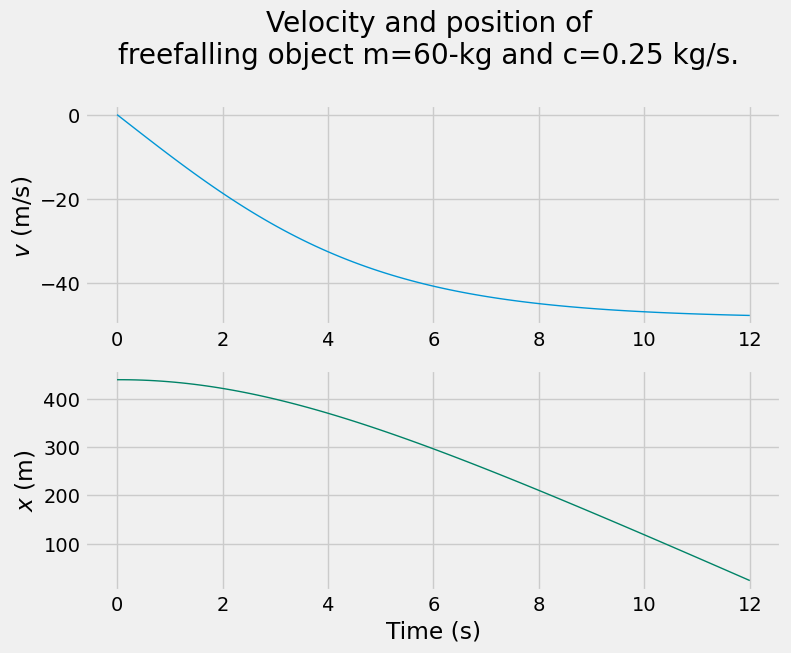

In [5]:
# plot velocity and position over time
fig = plt.figure(figsize=(8,6))

plt.subplot(211)
plt.plot(t,  v, color='#0096d6', linestyle='-', linewidth=1) 
plt.title('Velocity and position of \nfreefalling object m=60-kg and c=0.25 kg/s. \n')
plt.ylabel('$v$ (m/s) ')

plt.subplot(212)
plt.plot(t,  x, color='#008367', linestyle='-', linewidth=1) 
plt.xlabel('Time (s)')
plt.ylabel('$x$ (m)');

## Exercise

The initial height is 440 m, the height of the tip of the [Empire State Building](https://en.wikipedia.org/wiki/Empire_State_Building). How long would it take for the object to reach the ground from this height? How accurate is your estimation e.g. what is the error bar for your solution?

## Euler's method

You first used Euler's method in [Module_01: 03_Numerical_error](https://github.uconn.edu/rcc02007/CompMech01-Getting-started/blob/master/notebooks/03_Numerical_error.ipynb). Here you will look at it with more depth. 

The eminent Swiss mathematician Leonhard Euler presented it in his book _"Institutionum calculi integralis,"_ published around 1770 [3].

You can understand why it works by writing out a Taylor expansion for $x(t)$:

$x(t+\Delta t) = x(t) + \frac{d x}{dt}\Delta t + \frac{d^2
x}{dt^2}\frac{\Delta t^2}{2} + \frac{d^3 x}{dt^3}\frac{\Delta
t^3}{3!}+\cdots$

With $v=dx/dt$, you can see that the first two terms on the right-hand side correspond to what you used in the code above. That means that Euler's method makes an approximation by throwing away the terms $\frac{d^2 x}{dt^2}\frac{\Delta t^2}{2} + \frac{d^3 x}{dt^3}\frac{\Delta t^3}{3!}+\cdots$. So the error made in _one step_ of Euler's method is proportional to $\Delta t^2$. Since you take $N=T/\Delta t$ steps (for a final time instant $T$), you conclude that the error overall is proportional to $\Delta t$. 

#### **Euler's method is a first-order method** because the error in the approximation goes is proportional to the first power of the time increment $\Delta t$.

i.e.

error $\propto$ $\Delta t$

## Initial-value problems

To get velocity and position from the acceleration data, you needed to know the _initial values_ of the velocity and position. Then you could apply Euler's method to _step in time_ starting at $t_0$, with time increment $\Delta t$. This setting corresponds to the numerical solution of _initial-value problems_. 
(Follow here the presentation in [4], p.86.)

Consider the differential equation corresponding to an object in free fall:

$\ddot{y}=\frac{c}{m}v^2-g,$

where the dot above a variable represents the time derivative, and $g$ is the acceleration of gravity. Introducing the velocity as intermediary variable, you can write:

$\begin{array}
~\dot{y} &=& v \nonumber\\
\dot{v} &=& \frac{c}{m}v^2-g
\end{array}$

The above is a system of two ordinary differential equations, with time as the independent variable. For its numerical solution, you need two initial conditions, and Euler's method:

$\begin{array}
~y(t_0) = y_0, \qquad y_{i+1} &=& y_i + \dot{y} \Delta t \nonumber\\
v(t_0) = v_0, \qquad v_{i+1} &=& v_i + \dot{v} \Delta t
\end{array}$

It's so neatly symmetrical that it's just asking for a vectorized equation! Combine the two dependent variables into a vector of unknowns, $\mathbf{y}$:

$\mathbf{y} = \begin{bmatrix}
y \\ v
\end{bmatrix},$

and write the differential equation in vector form, as follows:

$\dot{\mathbf{y}} = \begin{bmatrix}
v \\ \frac{c}{m}v^2-g
\end{bmatrix}.$

Equation (9) above represents the _state_ of the system, at any given instant in time. A code design for the numerical solution that generalizes to other changing systems (or _dynamical systems_) is to write one function that computes the right-hand side of the differential equation (the derivatives of the state variables), and another function that takes a state and applies the numerical method for each time increment. The solution is then computed in one `for` statement that calls these functions.

Study the code below: the function `freefall()` computes the right-hand side of the equation, and the function `eulerstep()` takes the state and applies Euler's method to update it one time increment.

In [80]:
def freefall(state,c=0,m=60):
    '''Computes the right-hand side of the freefall differential 
    equation, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    c : drag coefficient for object; default set to 0 kg/m (so no drag considered)
    m : mass of falling object; default set to 60 kg
    
    Returns
    -------
    derivs: array of two derivatives [v, c/m*v**2-g]
    '''
    
    derivs = np.array([state[1], 
                       -c/m*state[1]**2*np.sign(state[1])-9.81])
    return derivs

In [81]:
freefall([10, 0])

array([ 0.  , -9.81])

In [82]:
def eulerstep(state, rhs, dt):
    '''Uses Euler's method to update a state to the next one. 
    
    Arguments
    ---------
    state: array of two dependent variables [y v]^T
    rhs  : function that computes the right hand side of the 
           differential equation.
    dt   : float, time increment. 
    
    Returns
    -------
    next_state: array, updated state after one time increment.       
    '''
    
    next_state = state + rhs(state) * dt
    return next_state

## Numerical solution vs. experiment

Use the `freefall()` and `eulerstep()` functions to obtain a numerical solution with the same initial conditions as the falling-ball experiment from [Lesson 1](./01_Catch_Motion.ipynb), and compare with the experimental data. 

In [Lesson 1](./01_Catch_Motion.ipynb), you had considered only the acceleration due to gravity. So before you get into the specifics of the effects on drag, leave c=0 so that you have a constant acceleration problem, 

$\ddot{y} = -g$

and our vector form is 

$\dot{\mathbf{y}} = \begin{bmatrix}
v \\ -g
\end{bmatrix}.$

In [110]:
! head ../data/projectile_coords.npz

PK       ! �[l�P  P    t.npy  P      P      �NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (26,), }                                                           
        �?�?�������?�?UUUUUU�?�������?�����ݽ?�?333333�?UUUUUU�?wwwwww�?�������?�������?�������?      �?�?""""""�?333333�?DDDDDD�?UUUUUU�?ffffff�?wwwwww�?�������?�������?�������?PK       ! ���P  P    x.npy  P      P      �NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (26,), }                                                           
��?�.�u�Y�?Y+��b��?���|�?�^W���?^d��}�?���?p��̩��?l�tc	��?$��R@+�?!����?�����?x��]�?u)�Y*�?ϧ�����?���,m�?���"�.�?��'����?�--����?PK       ! �OP  P    y.npy  P      P      �NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (26,), }                                                           
��#��vǿ�'3tȿ%X,��ȿ5�0k�ɿc�9��5ʿ��Fw��˿�JX�pο�T�G �пmQ�Ͷҿ��ѡ��ӿ`}�'5տ?D�����JwٿF��1ۿ�3'�i޿

In [83]:
filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True)

You'll need to use the same time increment, so let's compute it from two
time samples. The initial position is the first value of the `y` array,
while the initial velocity is zero. And you'll only look at the section
of data before the ball bounces from the ground, which gives us the
number of time steps.

In [84]:
#time increment
dt = (t[1]-t[0])


In [85]:
y0 = y[0] #initial position
v0 = 0    #initial velocity
N = 576   #number of steps

t_num = np.arange(0,N)*dt

Now, let's create a new array, called `num_sol`, to hold the results of the numerical solution. The array has dimensions `Nx2`, with each two-element row holding the state variables, $(y,v)$, at a given time instant. After saving the initial conditions in the solution array, you are ready to start stepping in time in a `for` statement. Study the code below.

In [86]:
#initialize array
num_sol = np.zeros([N,2])

In [87]:
#Set intial conditions
num_sol[0,0] = y0
num_sol[0,1] = v0
print(freefall(num_sol[0])*dt + num_sol[0])
print(eulerstep(num_sol[0],freefall,dt))

[ 1.6     -0.00981]
[ 1.6     -0.00981]


In [88]:
for i in range(N-1):
    num_sol_mid = eulerstep(num_sol[i], freefall, dt/2)
    num_sol[i+1] = eulerstep(num_sol_mid, freefall, dt/2)

Did it work? Exciting! Let's plot in the same figure both the numerical solution and the experimental data.

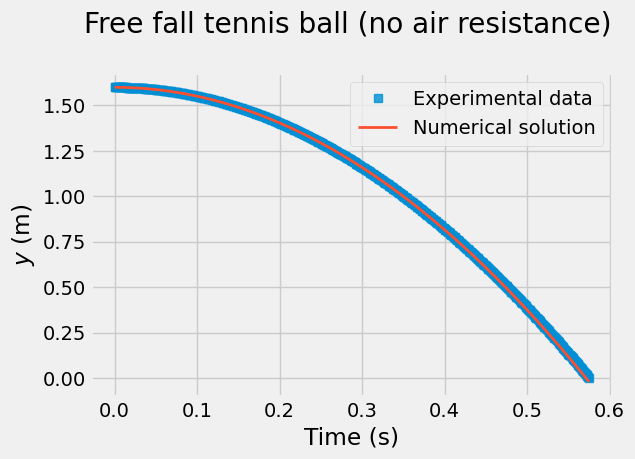

In [89]:
fig = plt.figure(figsize=(6,4))
plt.plot(t[:N], y[:N], 's', alpha=0.8, label='Experimental data')
plt.plot(t_num, num_sol[:,0], linewidth=2, linestyle='-', label='Numerical solution')
plt.xlabel('Time (s)')
plt.ylabel('$y$ (m)')
plt.title('Free fall tennis ball (no air resistance) \n')
plt.legend();

The two lines look very close… but let's plot the difference to get understand the [error](https://github.uconn.edu/rcc02007/CompMech01-Getting-started/blob/master/notebooks/03_Numerical_error.ipynb).

In [90]:
dt

0.001000000000000002

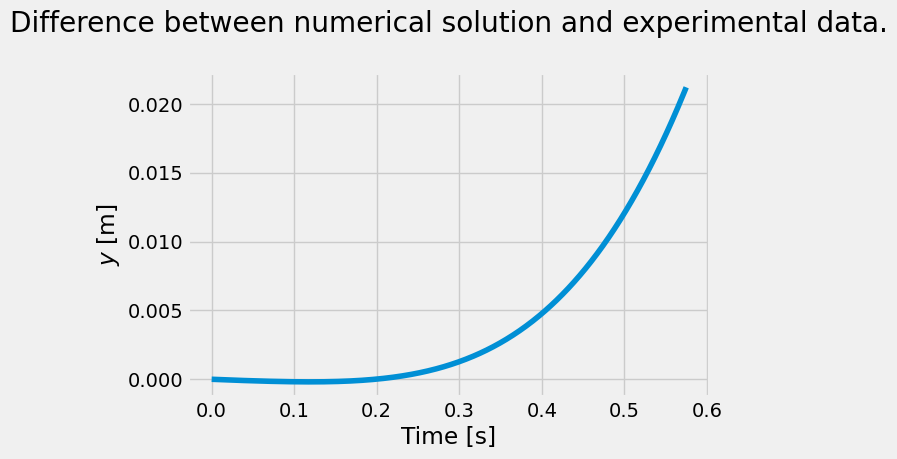

In [91]:
fig = plt.figure(figsize=(6,4))
plt.plot(t[:N], y[:N]-num_sol[:, 0])
plt.title('Difference between numerical solution and experimental data.\n')
plt.xlabel('Time [s]')
plt.ylabel('$y$ [m]');

## Exercise

Create a plot of the analytical solution for y-vs-t for an object that accelerates due to gravity, plot the difference between the analytical solution and the experimental data with the plot above. 

_Hint: remember the kinematic equations for constant acceleration_ $y(t) = y(0) + \dot{y}(0)t - \frac{gt^2}{2}$

## Air resistance

In [Lesson 1](./01_Catch_Motion.ipynb) of this module, you computed the acceleration of gravity and got a value less than the theoretical $9.8 \rm{m/s}^2$, even when using high-resolution experimental data. 

You did not account for air resistance. When an object moves in a fluid, like air, it applies a force on the fluid, and consequently the fluid applies an equal and opposite force on the object (Newton's third law).

This force is the *drag* of the fuid, and it opposes the direction of travel. The drag force depends on the object's geometry, and its velocity: for a sphere, its magnitude is given by:

$F_d = \frac{1}{2} \pi R^2 \rho C_d v^2,$

where $R$ is the radius of the sphere, $\rho$ the density of the fluid, $C_d$ the drag coefficient of a sphere, and $v$ is the velocity.

In the first module, you used the constant $c$, where $c= \frac{1}{2} \pi R^2 \rho C_d$.

You can update our defintion for drag with this _higher fidelity_ description of drag

With $F_{\text{drag}} = m a_{\text{drag}}$:

$a_{\text{drag}} = \frac{1}{2m} \pi R^2 \rho C_d v^2$

Finally, you can write our differential equation as:


$\dot{\mathbf{y}} = \begin{bmatrix}
v \\ -g + a_{\text{drag}}
\end{bmatrix}.$

Let's write a new function for this modified right-hand side of a falling tennis ball with air resistance.

##### Note:

According to the International Tennis Federation,
[ITF](http://www.itftennis.com/home.aspx), the diameter of a tennis ball
has to be in the range of $6.54$–$6.86 \rm{cm}$, and its mass in the
range of $56.0$–$59.4 \rm{g}$. Choose a value in the middle of the range for each quantity.

In [102]:
def fall_drag(state,C_d=0.51,m=0.0577,R = 0.0661/2):
    '''Computes the right-hand side of the differential equation
    for the fall of a ball, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    m : mass in kilograms default set to 0.0577 kg
    C_d : drag coefficient for a sphere default set to 0.47 (no units)
    R : radius of ball default in meters is 0.0661/2 m (tennis ball)
    Returns
    -------
    derivs: array of two derivatives [v (-g+a_drag)]^T
    '''
    
    rho = 1.22   # air density kg/m^3
    pi = np.pi
    
    a_drag = -1/(2*m) * pi * R**2 * rho * C_d * (state[1])**2*np.sign(state[1])
    
    derivs = np.array([state[1], -9.8 + a_drag])
    return derivs

Assume the same initial conditions as before:

In [103]:
y0 = y[0] # initial position
v0 = 0    # initial velocity
N = 576   # number of steps

In [104]:
# initialize array
num_sol_drag = np.zeros([N,2])

In [105]:
# Set intial conditions
num_sol_drag[0,0] = y0
num_sol_drag[0,1] = v0

In [106]:
for i in range(N-1):
    num_sol_drag[i+1] = eulerstep(num_sol_drag[i], fall_drag, dt)

Time to plot and see how it looks! Would you expect the results to be better than in the previous case? Let's plot the three cases and check the differences.

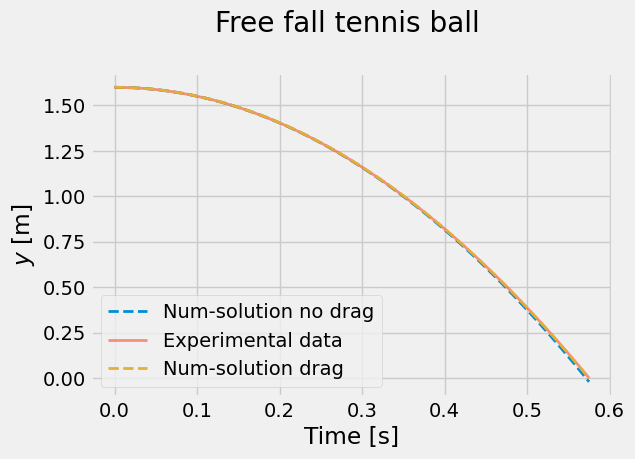

In [107]:
fig = plt.figure(figsize=(6,4))
plt.plot(t[:N], num_sol[:,0], linewidth=2, linestyle='--', label='Num-solution no drag')
plt.plot(t[:N], y[:N], linewidth=2, alpha=0.6, label='Experimental data')
plt.plot(t[:N], num_sol_drag[:,0], linewidth=2, linestyle='--', label='Num-solution drag')

plt.title('Free fall tennis ball \n')

plt.xlabel('Time [s]')
plt.ylabel('$y$ [m]')
plt.legend();

All the lines look very close… but let's plot the differences with the experimental data in both cases, to get an idea of the error.

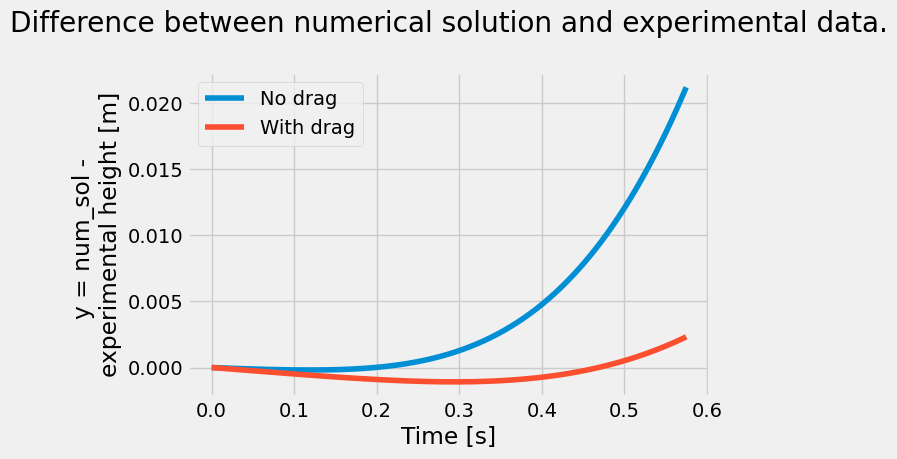

In [108]:
fig = plt.figure(figsize=(6,4))
plt.plot(t[:N], y[:N]-num_sol[:,0], label='No drag')
plt.plot(t[:N], y[:N]-num_sol_drag[:,0], label='With drag')
plt.title('Difference between numerical solution and experimental data.\n')
plt.xlabel('Time [s]')
plt.ylabel('y = num_sol - \nexperimental height [m]')
plt.legend();

## Discussion

* What do you see in the plot of the difference between the numerical solution and the experimental data?

* Is the error plotted above related to truncation error? Is it related to roundoff error?

## What you've learned

* Integrating an equation of motion numerically.
* Drawing multiple plots in one figure,
* Solving initial-value problems numerically
* Using Euler's method.
* Euler's method is a first-order method.
* Freefall with air resistance is a more realistic model.

## References

1. _Elementary Mechanics Using Python_ (2015), Anders Malthe-Sorenssen, Undergraduate Lecture Notes in Physics, Springer. Data at http://folk.uio.no/malthe/mechbook/

2. _The Physics Hyptertextbook_ (n/a), Glenn Elert, [Acceleration](https://physics.info/acceleration/)

3. Euler method. (2017, October 13). In Wikipedia, The Free Encyclopedia. Retrieved 01:21, November 10, 2017, from https://en.wikipedia.org/w/index.php?title=Euler_method&oldid=805120184

4. _Computational Physics with Python_, lecture notes by Eric Ayars, California State University, Chico. Available online on the author's youbsite: https://physics.csuchico.edu/ayars/312/handouts/comp-phys-python.pdf